In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import plot_tree
%matplotlib inline

from IPython.display import display

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-09 22:14:38--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.06s   

2025-11-09 22:14:38 (13.8 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



# Homework

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

## Preparing the dataset

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
# Fill missing values with zeros.
df = df.fillna(0)

In [4]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [5]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')

In [6]:
# Create the matrices.
X_train = dv.fit_transform(train_dicts)
X_train

array([[1.39000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.96667950e+03],
       [1.71000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95082212e+03],
       [1.74000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.07822167e+03],
       ...,
       [1.67000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.04196459e+03],
       [1.52000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.45334143e+03],
       [1.41000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.83389943e+03]])

## Question 1

In [9]:
# Let's train a decision tree Regressor to predict the fuel_efficiency_mpg variable.
# Train a model with max_depth=1.
dt = DecisionTreeRegressor(max_depth=1)

In [10]:
# Which feature is used for splitting the data ?
dt.fit(X_train, y_train)
print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

In [15]:
# Train a random forest regressor with these parameters:
# n_estimators=10
# random_state=1
# n_jobs=-1 (optional - to make training faster)
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# What's the RMSE of this model on the validation data?
rf.fit(X_train, y_train)
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = rf.predict(X_val)

rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.46


## Question 3

In [19]:
# Now let's experiment with the n_estimators parameter
# Try different values of this parameter from 10 to 200 with step 10.
# Set random_state to 1.
# Evaluate the model on the validation dataset.
# After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.
rmses = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
    rmses.append((n, rmse))
    print(f'n_estimators: {n}, RMSE: {rmse:.3f}')


n_estimators: 10, RMSE: 0.457
n_estimators: 20, RMSE: 0.452
n_estimators: 30, RMSE: 0.450
n_estimators: 40, RMSE: 0.448
n_estimators: 50, RMSE: 0.446
n_estimators: 60, RMSE: 0.445
n_estimators: 70, RMSE: 0.445
n_estimators: 80, RMSE: 0.445
n_estimators: 90, RMSE: 0.444
n_estimators: 100, RMSE: 0.444
n_estimators: 110, RMSE: 0.443
n_estimators: 120, RMSE: 0.443
n_estimators: 130, RMSE: 0.443
n_estimators: 140, RMSE: 0.443
n_estimators: 150, RMSE: 0.442
n_estimators: 160, RMSE: 0.442
n_estimators: 170, RMSE: 0.442
n_estimators: 180, RMSE: 0.442
n_estimators: 190, RMSE: 0.442
n_estimators: 200, RMSE: 0.442


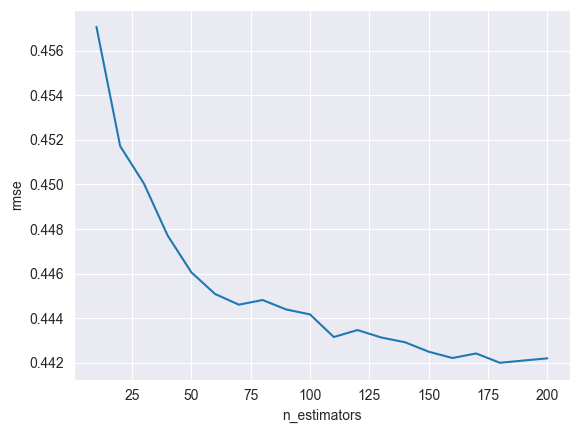

In [20]:
# plot the rmses and n_estimators to find the point where RMSE stops improving
rmses_df = pd.DataFrame(rmses, columns=['n_estimators', 'rmse'])
sns.lineplot(data=rmses_df, x='n_estimators', y='rmse')
plt.show()

## Question 4

In [21]:
# Let's select the best max_depth:
# Fix the random seed: random_state=1
# Try different values of max_depth: [10, 15, 20, 25]
# For each of these values,
    # try different values of n_estimators from 10 till 200 (with step 10)
    # calculate the mean RMSE
# What's the best max_depth, using the mean RMSE?
depths = [10, 15, 20, 25]
best_rmse = float('inf')
best_depth = None
for depth in depths:
    rmses = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
        rmses.append(rmse)
    mean_rmse = np.mean(rmses)
    print(f'max_depth: {depth}, Mean RMSE: {mean_rmse:.3f}')
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_depth = depth
print(f'Best max_depth: {best_depth} with Mean RMSE: {best_rmse:.3f}')

max_depth: 10, Mean RMSE: 0.442
max_depth: 15, Mean RMSE: 0.445
max_depth: 20, Mean RMSE: 0.446
max_depth: 25, Mean RMSE: 0.445
Best max_depth: 10 with Mean RMSE: 0.442


## Question 5

In [24]:
# We can extract feature importance information from tree-based models.
# Train the model with these parameters:
# n_estimators=10,max_depth=20, random_state=1, n_jobs=-1 (optional)
# Get the feature importance information from this model
# What's the most important feature (among these 4)?
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = dv.get_feature_names_out()
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1
], reverse=True)

# What's the most important feature (among these 4) - vehicle_weight, horsepower, acceleration, engine_displacement
for feature, importance in feature_importances:
    if feature in ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']:
        print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: vehicle_weight, Importance: 0.9592
Feature: horsepower, Importance: 0.0160
Feature: acceleration, Importance: 0.0115
Feature: engine_displacement, Importance: 0.0033


- vehicle_weight is the most important feature.

## Question 6

In [25]:
# Now let's train an XGBoost model!
# Create DMatrix for train and validation
# Create a watchlist
# xgb_params = { 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1,'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1,}
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

# Train a model with these parameters for 100 rounds:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

# calculate the RMSE on the validation dataset
y_pred = model.predict(dval)
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
print(f'RMSE with eta=0.3 : {rmse:.2f}')

# Now change eta from 0.3 to 0.1.
xgb_params['eta'] = 0.1

# Which eta leads to the best RMSE score on the validation dataset?
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)
y_pred = model.predict(dval)
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
print(f'RMSE with eta=0.1: {rmse:.2f}')

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va

-  eta 0.1 has the best RMSE score on the validation dataset of 0.43

**Note** : Values obtained below
- RMSE with eta=0.3 : 0.45
- RMSE with eta=0.1: 0.43
